In [1]:
import pandas as pd 
from sklearn.cluster import KMeans,DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_set = pd.read_pickle("headline_ex2.pkl")

In [3]:
data_set = data_set.drop(columns=['country'])

In [4]:
data_set = data_set[data_set['city'].notnull()]

In [5]:
data_set

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
...,...,...,...,...,...
645,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,31.76904,35.21633,IL
646,More Zika patients reported in Indang,Indang,14.19528,120.87694,PH
647,Suva authorities confirmed the spread of Rotav...,Suva,-18.14161,178.44149,FJ
648,More Zika patients reported in Bella Vista,Bella Vista,-27.03424,-65.30196,AR


In [6]:
k_mean_position_cluster = KMeans(n_clusters = 4).fit(data_set[['latitude','longitude']])

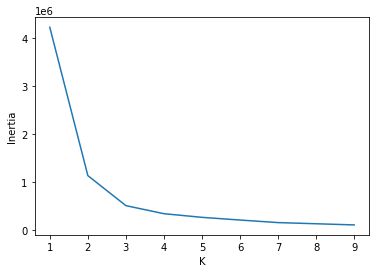

In [7]:
k_value = range(1,10) 
inertia_val = [KMeans(k).fit(data_set[['latitude','longitude']]).inertia_ for k in k_value]

plt.plot(k_value, inertia_val )
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

[[ 34.996053   -90.46540116]
 [  5.42372627 119.0592551 ]
 [ 33.62267536  13.46782864]
 [ -9.26870014 -61.58370784]]


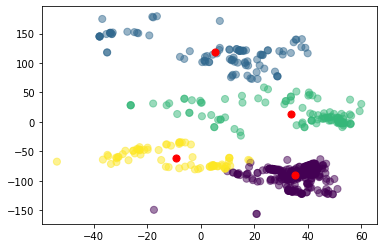

In [8]:
centroids = k_mean_position_cluster.cluster_centers_
print(centroids)
plt.scatter(data_set['latitude'],data_set['longitude'],c = k_mean_position_cluster.labels_.astype(float),s = 50 , alpha = 0.5)
plt.scatter(centroids[:,0],centroids[:,1],c = 'red', s = 50)
plt.show()

In [9]:
DBSCAN_POS_Cluster = DBSCAN(eps= 10, min_samples = 10)
DBSCAN_POS_Cluster.fit(data_set[['latitude','longitude']])
DBSCAN_label = DBSCAN_POS_Cluster.labels_
#print(DBSCAN_label)


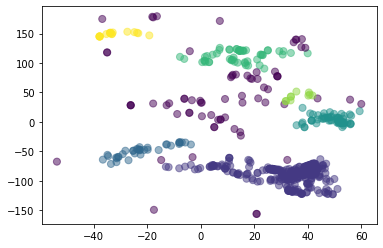

In [10]:
plt.scatter(data_set['latitude'],data_set['longitude'],c = DBSCAN_label.astype(float),s = 50 , alpha = 0.5)

In [11]:
print(len(DBSCAN_label))

606


In [12]:
print(set(DBSCAN_label))

{0, 1, 2, 3, 4, 5, -1}


In [13]:
data_set['K-Mean_label'] = k_mean_position_cluster.labels_

In [14]:
data_set['DBSCAN_label'] = DBSCAN_label

In [15]:
from mpl_toolkits.basemap import Basemap
map_plotter = Basemap()

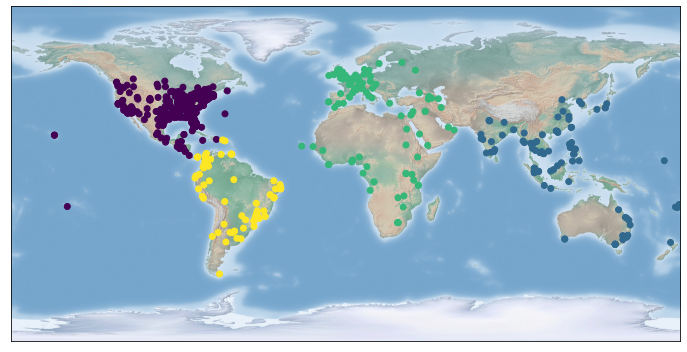

In [16]:
fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(data_set['longitude'],data_set['latitude'], latlon=True,c=k_mean_position_cluster.labels_.astype(float))
map_plotter.shadedrelief()
plt.show()

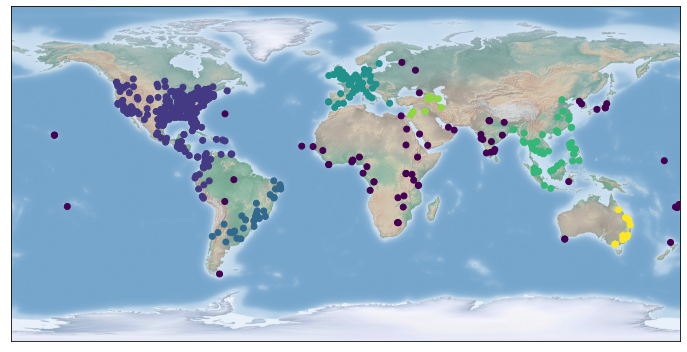

In [17]:
fig = plt.figure(figsize=(12, 8))
map_plotter.scatter(data_set['longitude'],data_set['latitude'], latlon=True,c= DBSCAN_label.astype(float))
map_plotter.shadedrelief()
plt.show()

Test Great Circle

In [18]:
from math import radians, degrees, sin, cos, asin, acos, sqrt


def great_circle(point1, point2):
    
    lon1, lat1, lon2, lat2 = map(radians, [point1[1], point1[0], point2[1], point2[0]])
    
    return 6371 * (
        acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lon1 - lon2))
    )

def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [19]:

DBSCAN_POS_Cluster = DBSCAN(eps= 10, min_samples = 10,metric= haversine )
DBSCAN_POS_Cluster.fit(data_set[['latitude','longitude']])
DBSCAN_label = DBSCAN_POS_Cluster.labels_
print(DBSCAN_label)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [20]:
data_set

,headline,city,latitude,longitude,countrycode,K-Mean_label,DBSCAN_label
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US,0,0
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US,0,0
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US,0,0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR,3,1
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US,0,0
...,...,...,...,...,...,...,...
645,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,31.76904,35.21633,IL,2,4
646,More Zika patients reported in Indang,Indang,14.19528,120.87694,PH,1,3
647,Suva authorities confirmed the spread of Rotav...,Suva,-18.14161,178.44149,FJ,1,-1
648,More Zika patients reported in Bella Vista,Bella Vista,-27.03424,-65.30196,AR,3,1
